When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

## In the project we are going to predict the total sales generated from all the sales channel.  

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading a dataset
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


with the above observation of dataset,our target variable is Sales and we are going to predict total sales considering the features like Tv,radio and newspaper sales.

In [5]:
#we can just drop the first column from dataframe which is consisting of just id numbers

df = df.drop(["Unnamed: 0"],axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#to check how many rows and columns in dataframe
df.shape

(200, 4)

In [7]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [8]:
#to get statistics information
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


with above information,we can see there no missing values in any column and we can also observe the fact that radio column contains a minimum value of even 0 value,which means the sales can even go with zero amount as well.

In [9]:
#to check all the values count in dependent variable 'quality'
df['sales'].value_counts()

9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

In [10]:
#to check whether any null values present in dataframe
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

with this we are good to proceed as we dont have any null values or missing values in our dataset

## Visualization

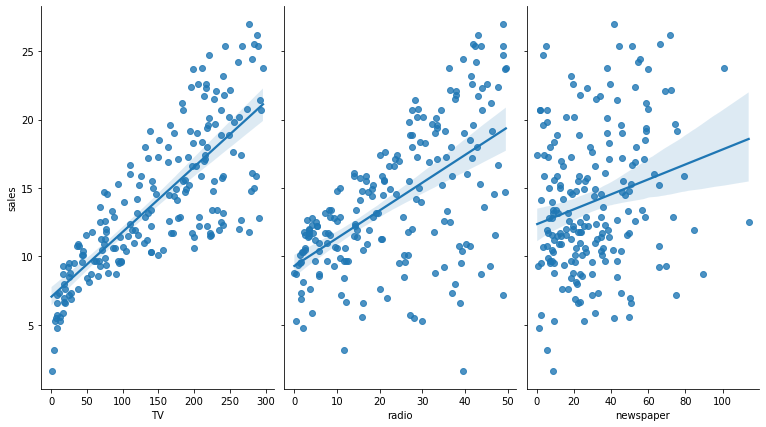

In [15]:
#Since the data is continuous for all columns so we use Pairplot
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=6, aspect=0.6, kind='reg');

#### with above obsevation,we can say that "TV" column has more linearity with "Sales" column(Target variable).
#### "newspaper" column has less linearity with tagert variable compared to other columns.

### Ploting a Normal Distribution Curve

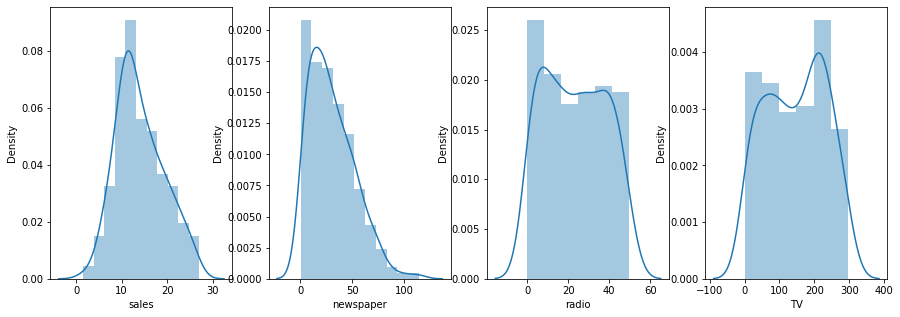

In [19]:
import warnings
warnings.filterwarnings('ignore') # to remove warning messages

fig, axs = plt.subplots(ncols=4)   #alloting no.of subplots in column wise
fig.set_size_inches(15, 5)

sns.distplot(df.sales, ax=axs[0]);      
sns.distplot(df.newspaper, ax=axs[1]);
sns.distplot(df.radio, ax=axs[2]);
sns.distplot(df.TV, ax=axs[3]);

with the above evidence, the data present in each coumn is not normalized and building blocks are out of normalized curve for all columns.

## Correlation

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [22]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

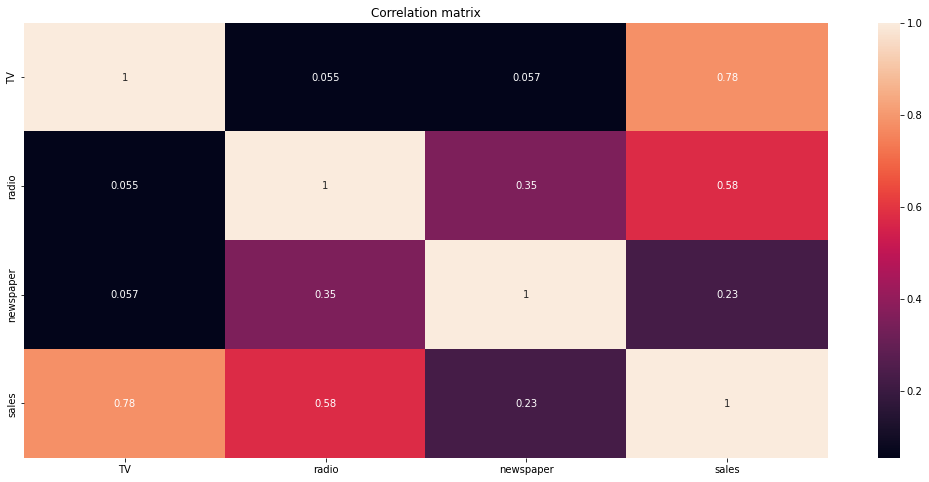

In [23]:
#plotting the correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

###  With above obsevation,all columns are positively correlated with target variable
#### "TV" column has more correlation(78%) with Target variable
#### "Newspaper" column has less correlation(23%) with target variable

## Checking with outliers

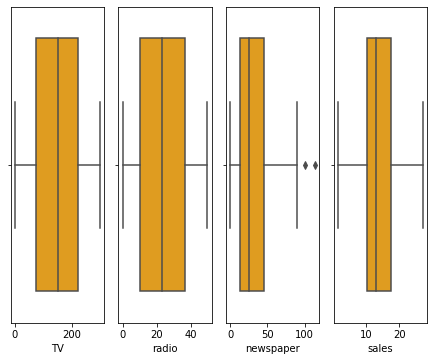

In [28]:
column_list = df.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (1.5*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='v')
  plt.tight_layout()

We can see that just few outliers present in newspaper column and no where else,
so its good to proceed further

## checking with Skewness

In [29]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

with this,newspaper column has more skewness then compared with other columns

### Data cleaning

In [30]:
#Since by doing all the analysis on each each column,we dont have enough evidence to remove/drop any values/cloumn from dataframe
#All columns are equally important for determining the total sales

### Removing the outliers

In [31]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(200, 4)

In [32]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(200, 4)
(198, 4)
2


### calcuating the percentage of data loss

In [33]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:1.00%


ther is a 1% data loss which is good to proceed for further

### Dividing the data into features and vectors

In [51]:
y = df_new[["sales"]]
x = df_new.drop(["sales"],axis=1)

### Transforming data to eliminate skewness

In [52]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154]])

In [54]:
from sklearn.preprocessing import power_transform
y = power_transform(y)
y[:5]

array([[ 1.46479501],
       [-0.63994657],
       [-0.88829643],
       [ 0.89364186],
       [-0.11779609]])

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154]])

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = sc.fit_transform(y)
y[:5]

array([[ 1.46479501],
       [-0.63994657],
       [-0.88829643],
       [ 0.89364186],
       [-0.11779609]])

with the above observation,we can see that both methods are performing in same way while removing the skewness of data.

## Selecting a best random state

In [57]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.9579606609623855  on Random state  24


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =.20,random_state=24)

In [60]:
print(x_train.shape,y_train.shape)

(158, 3) (158, 1)


In [61]:
print(x_test.shape,y_test.shape)

(40, 3) (40, 1)


In [64]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [66]:
#to predict the the total sales we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic)))


r2_score is 0.958
mse is 0.038
rmse is 0.194
mae is 0.151


In [69]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic)))


r2_score is 0.958
mse is 0.038
rmse is 0.194
mae is 0.151


In [71]:
#using Ridge
from sklearn.linear_model import Ridge 
Rd = Ridge()
Rd.fit(x_train,y_train)
Rd = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic)))

r2_score is 0.958
mse is 0.038
rmse is 0.194
mae is 0.151


In [72]:
#Using Lasso model
from sklearn.linear_model import Lasso
LS = Lasso()
LS.fit(x_train,y_train)
Rd = LS.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic)))

r2_score is 0.958
mse is 0.038
rmse is 0.194
mae is 0.151


It looks like all models are giving same results,
So,Now lets go for Cross Validation to check with overfitting.

### Cross Validation to check with overfitting.

In [73]:
from sklearn.model_selection import cross_val_score

#for LinearRegression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Linear regression model : ",L_cr.mean())

cross validation for Linear regression model :  0.8981846721728178


In [74]:
L_cr = cross_val_score(Bay,x,y,cv=5)
print("cross validation for BayesianRidge model : ",L_cr.mean())

cross validation for BayesianRidge model :  0.8982639211938608


In [75]:
L_cr = cross_val_score(LS,x,y,cv=5)
print("cross validation for Lasso model : ",L_cr.mean())

cross validation for Lasso model :  -0.013844447927781233


with above observation,both Linear reg and BayesianRidge models are performing at same level and i will take my final model as LinearRegression model.

In [77]:
from sklearn.model_selection import GridSearchCV

params_list = {'fit_intercept':[False,True],
               'normalize':[True,False],
               'n_jobs' :[2,3,4,5],
               'positive':[True,False]
              }
GCV = GridSearchCV(LinearRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'fit_intercept': False, 'n_jobs': 2, 'normalize': True, 'positive': True}

In [78]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
r2_score(y_test,GCV_predic)

0.9604778375243068

In [79]:
import joblib
joblib.dump(GCV.best_estimator_,"Advertising Sales Channel Prediction.pkl")

['Advertising Sales Channel Prediction.pkl']